<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Some-Simple-Stats" data-toc-modified-id="Some-Simple-Stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Some Simple Stats</a></span></li><li><span><a href="#Sort-by-Value" data-toc-modified-id="Sort-by-Value-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sort by Value</a></span></li><li><span><a href="#Values-with-Counts-in-Categorical-Column" data-toc-modified-id="Values-with-Counts-in-Categorical-Column-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Values with Counts in Categorical Column</a></span></li></ul></div>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

The data set was found on kaggle https://www.kaggle.com/datasets/c42c23283d8df6763bc773db084063d008fa56abd1245a8fae07ce2426336694?resource=download
   



In [5]:
df = pd.read_csv('./data/uk_universities.csv')
print(f"The shape of the data, rows:{df.shape[0]} and columns:{df.shape[1]}")
df.head(10)


The shape of the data, rows:131 and columns:21


,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),...,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,21750,23187,...,85.50%,"20,000-24,999","over-5,000",Public,Trimesters,Urban,12000,52.2054,0.1132,www.cam.ac.uk
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,21770,19888,...,86.50%,"25,000-29,999","over-5,000",Public,Trimesters,Urban,11500,51.7548,-1.2544,www.ox.ac.uk
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,17040,15440,...,87.90%,"10,000-14,999","1,000-1,499",Public,Semesters,Suburban,12000,56.3417,-2.7943,www.st-andrews.ac.uk
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,23500,29900,...,77.90%,"15,000-19,999","4,000-4,499",Public,Continuous,Urban,10700,51.4988,-0.1749,www.ic.ac.uk
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,16400,16400,...,85.80%,"15,000-19,999","1,500-1,999",Public,Semesters,Suburban,9398,52.7650,-1.2321,www.lboro.ac.uk/
5,London School of Economics and Political Science,London,1895,To know the causes of things,6,23,76.3,6.5,17040,24500,...,68.50%,"10,000-14,999","1,500-1,999",Public,Semesters,Urban,12000,51.5144,-0.1165,www.lse.ac.uk
6,Durham University,North East England,1832,Her foundations are upon the holy hills,7,70,76.3,5.5,14900,18000,...,75.00%,"15,000-19,999","1,500-1,999",Public,Trimesters,Urban,8000,54.7650,-1.5782,www.dur.ac.uk
7,Lancaster University,North West England,1964,Truth lies open to all,8,130,76.1,5.5,14940,14200,...,79.30%,"10,000-14,999","2,000-2,499",Public,Trimesters,Rural,8500,54.0104,-2.7877,www.lancs.ac.uk
8,University College London,London,1826,Let all come who by merit most deserve reward,9,14,88.0,6.5,15660,17250,...,75.40%,"40,000-44,999","over-5,000",Public,Other,Urban,11500,51.5246,-0.1340,www.ucl.ac.uk
9,University of Warwick,West Midlands,1965,Mind Moves matter,10,80,79.3,5.5,15820,24500,...,79.20%,"25,000-29,999","2,500-2,999",Public,Trimesters,Suburban,9580,52.3793,-1.5615,www.warwick.ac.uk


world ranking mean: 1097.5954198473282
world ranking median: 691.0


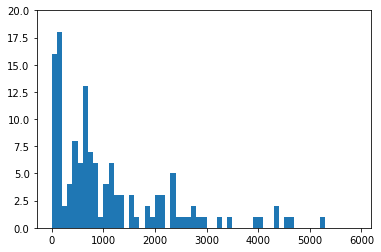

In [26]:
#medium world rank
world_ranking = df['World_rank']

plt.hist(world_ranking, bins=range(0,6000,100))
plt.ylim(0,20)
plt.show()

Seems like the world rannks is quite right skewed. Trying a sqrt transform to get the distribution a little more normal.

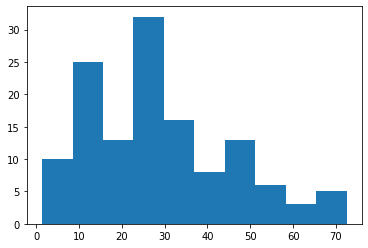

In [25]:

plt.hist(np.sqrt(world_ranking))
plt.show()

In [42]:

print(f"world ranking mean: {world_ranking.mean()}")
print(f"world ranking median: {world_ranking.median()}")

# how many uk unis have a top 500 ranks
t_500_rank = df[df['World_rank'] <= 500]
print(f"Number of unis in UK with top 500 ranking: {t_500_rank.shape[0]}")

t_500_rank[["UK_rank","World_rank"]
           ].describe()

Number of unis in UK with top 500 ranking: 48


,UK_rank,World_rank
count,48.000000,48.000000
mean,28.291667,184.937500
std,20.006338,141.978783
min,1.000000,2.000000
25%,12.750000,84.500000
50%,25.500000,146.000000
75%,37.250000,271.000000
max,79.000000,469.000000


## Some Simple Stats 

In [51]:
#list of colleges in top 50 
#note: loc[boolean_filter, ]
print("The UK Universities in the top 50 world ranking")
df.loc[df['World_rank'] <= 50,["University_name","World_rank"]]



The UK Universities in the top 50 world ranking


,University_name,World_rank
0,University of Cambridge,4
1,University of Oxford,2
3,Imperial College London,8
5,London School of Economics and Political Science,23
8,University College London,14
24,University of Edinburgh,24
29,King's College London,27


## Sort by Value

In [58]:
#universities in scotland scotland, wales
scot_wales_filter = df["Region"].isin(["Scotland","Wales"])
scot_wales_df = df[scot_wales_filter]
scot_wales_df[["University_name","World_rank","Region"]].sort_values("World_rank")


,University_name,World_rank,Region
24,University of Edinburgh,24,Scotland
15,University of Glasgow,76,Scotland
2,University of St Andrews,86,Scotland
26,University of Aberdeen,172,Scotland
33,Cardiff University,182,Wales
23,University of Dundee,185,Scotland
32,Heriot-Watt University,314,Scotland
35,University of Strathclyde,384,Scotland
30,Swansea University,422,Wales
44,Aberystwyth University,466,Wales


## Values with Counts in Categorical Column

In [60]:
df['Region'].value_counts()

London                      22
South East England          17
Scotland                    14
South West England          12
North West England          11
Yorkshire and the Humber    11
East of England             10
West Midlands               10
Wales                        9
East Midlands                7
North East England           6
Northern Ireland             2
Name: Region, dtype: int64

## group by

In [68]:
# group by region and campus setting.
df.groupby(["Region","Campus_setting"])["University_name"].count()

Region                    Campus_setting
East Midlands             Suburban           4
                          Urban              2
East of England           Suburban           3
                          Urban              6
London                    Suburban           4
                          Urban             15
North East England        Rural              1
                          Urban              5
North West England        Rural              1
                          Suburban           1
                          Urban              7
Northern Ireland          Urban              2
Scotland                  Suburban           5
                          Urban              9
South East England        Rural              1
                          Suburban           7
                          Urban              5
South West England        Rural              2
                          Suburban           4
                          Urban              2
Wales              

## indexes

## updating dataframe

## lambda

## working with NA